# Analysis of Movie Piracy

Peter Currie, Otto Pfefferkorn, Andy Zheng

## Introduction

Movies are a popular form of entertainment that have been enjoyed by people all around the world for many years. With the rise of the internet, however, it has become easier than ever to view movies online. This has also led to a massive rise in movie piracy, which is the unauthorized watching or reproduction of movies without the permission of the copyright owner. More information about movie piracy can be found here: https://www.legalmatch.com/law-library/article/movie-piracy.html#:~:text=In%20short%2C%20movie%20piracy%20is,umbrella%20of%20intellectual%20property%20laws.

Piracy has become a major issue for the movie industry, as it results in a significant financial hit for both filmmakers and movie studios. Pirated movies are often sold or distributed online for a fraction of the price of a legitimate movie, and sometimes it would be shown on websites for free with ads, which makes it a very attractive option for many people who are looking for an easy way to watch a movie they want to see.

The piracy of movies not only affects the finances of the movie industry but also has an effect on the quality of the movies themselves. When people pirate movies, they often watch them on websites with a ton of ads, or download them from questionable sources, which can result in a very poor viewing experience as the movie would usually be low quality . Not only is piracy illegal, it also takes away from the creative and innovative work of the people involved in making a movie. Filmmakers rely on revenue generated from movie theatre ticket sales and legitimate DVD/BluRay and streaming purchases in order to fund their projects and create future films.

This project will examine the piracy of movies by industry, and look at how much time there is between the release of the movie and the piracy of the movie.

# Data Parsing and Cleanup

The data in use is a database of pirated movies from kaggle.com.
https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-website

The data is in the form of a csv file containing over 20,000 movie entries with quantitative fields such as:
IMDB Rating
Appropriate Rating
Download Count - Downloaded from pirate website
Industry it was made in - Like Hollywood or Bollywood
Date the movie was released
Date the movie was posted onto a pirate website
View count on pirated website


For the sake of making the data easier to visualize, columns with unusable qualitative date have been removed

In [9]:
import pandas as pd
import numpy as np

movie_data = pd.read_csv("movies_dataset.csv", sep=',')

#Movie Piracy Database - drop qualitative data
movie_data = movie_data.drop(columns=['Unnamed: 0','id'])
movie_data = movie_data.drop(columns=['storyline', 'writer', 'director'])
movie_data = movie_data.drop(columns=['run_time'])

movie_data



,IMDb-rating,appropriate_for,downloads,industry,language,posted_date,release_date,title,views
0,4.8,R,304,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,Little Dixie,"2,794"
1,6.4,TV-PG,73,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,Grilling Season: A Curious Caterer Mystery,"1,002"
2,5.2,R,"1,427",Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,In the Earth,"14,419"
3,8.1,NaN,"1,549",Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,Vaathi,"4,878"
4,4.6,NaN,657,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,Alone,"2,438"
...,...,...,...,...,...,...,...,...,...
20543,NaN,NaN,"1,998",Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,Bhai-Bahen,"6,219"
20544,7.7,NaN,"6,080",Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,Devdas,"16,376"
20545,8.0,NaN,"3,276",Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,Madhumati,"7,220"
20546,NaN,NaN,309,Wrestling,English,"10 Feb, 2023",Feb 09 2023,TNA.Impact 2023-02-09,"1,419"


There are many entries where the release date and posted date are January 1st of 1970. There is a high likelihood that these dates are invalid because January 1 1970 is the base for POSIX time, which is the default time. Some entries' dates must have been caught as an error and forced into POSIX time.
To ameloriate this issue, all dates of that kind are going to be masked to NaN for disposal.

In [10]:

#replace POSIX dates with NaN
na_release_dates = movie_data['release_date'].mask(movie_data['release_date'] == 'Jan 01 1970')
na_posted_dates = movie_data['posted_date'].mask(movie_data['posted_date'] == '01 Jan, 1970')

movie_data['release_date'] = na_release_dates
movie_data['posted_date'] = na_posted_dates

movie_data

,IMDb-rating,appropriate_for,downloads,industry,language,posted_date,release_date,title,views
0,4.8,R,304,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,Little Dixie,"2,794"
1,6.4,TV-PG,73,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,Grilling Season: A Curious Caterer Mystery,"1,002"
2,5.2,R,"1,427",Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,In the Earth,"14,419"
3,8.1,NaN,"1,549",Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,Vaathi,"4,878"
4,4.6,NaN,657,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,Alone,"2,438"
...,...,...,...,...,...,...,...,...,...
20543,NaN,NaN,"1,998",Bollywood / Indian,Hindi,NaN,Mar 13 1959,Bhai-Bahen,"6,219"
20544,7.7,NaN,"6,080",Bollywood / Indian,Hindi,NaN,May 13 1955,Devdas,"16,376"
20545,8.0,NaN,"3,276",Bollywood / Indian,Hindi,NaN,Mar 28 1958,Madhumati,"7,220"
20546,NaN,NaN,309,Wrestling,English,"10 Feb, 2023",Feb 09 2023,TNA.Impact 2023-02-09,"1,419"


The csv file contains many empty cells where data turns up as POSIX time or NaN and cannot be used for manipulation and analysis. It is advantageous to find the columns with large amounts of NaN values in the event it needs to be removed from analysis.

In [11]:


#There is a significant amount of null data in the dataframe

#Find NaN count by column
na_counts = movie_data.isna().sum()

#Create array of industries for iteration, deleting nan value
industries = movie_data['industry'].unique()
industries = [x for x in industries if str(x) != 'nan']

#group of groups by industry
movies_by_industry = movie_data.groupby('industry')

industry_hash = {}
#create individual dataframes by industry and put them into a hashmap
#used for hashmaps of percentage values
for industry in industries:
    industry_hash[industry] = movies_by_industry.get_group(industry)

na_counts


IMDb-rating         841
appropriate_for    9476
downloads             1
industry              1
language            546
posted_date          66
release_date        963
title                 1
views                 1
dtype: int64

The appropriate_for column is missing 9476 values, about half of the size of the database. This field cannot be used for analysis, but maybe it can be reduced by percentage in an industry. The next step is to find the percentage of NaN values per industry.

In [12]:
na_by_industry = {}
#this hashmap is for the percentage of NaN values in the appropriate_for category by industry
for industry in industries:
    appropriate_column = industry_hash[industry]['appropriate_for']
    #na count divided by total size, rounded to 3 decimal places
    temp_na_percentage = round(appropriate_column.isna().sum()/appropriate_column.size * 100, 3)
    na_by_industry[industry]= temp_na_percentage

na_by_industry

{'Hollywood / English': 40.064,
 'Tollywood': 70.563,
 'Wrestling': 96.998,
 'Bollywood / Indian': 58.866,
 'Punjabi': 87.952,
 'Anime / Kids': 28.122,
 'Dub / Dual Audio': 8.889,
 'Pakistani': 89.13,
 'Stage shows': 100.0,
 '3D Movies': 0.0}

As shown, null values are a significant percentage of nearly every industry, so the issue is widespread. The appropriate_for value cannot be used in analysis unless there is evidence that an industry with a low NaN count makes a significant portion of the database. That specific industry could be used for analysis then.

In [13]:
industry_percentage = {}
#percentage of movies made by industry
for industry in industries:
        percentage = round(industry_hash[industry].size/movie_data.size * 100, 3)
        industry_percentage[industry] = percentage

industry_percentage

{'Hollywood / English': 71.292,
 'Tollywood': 5.704,
 'Wrestling': 2.107,
 'Bollywood / Indian': 12.872,
 'Punjabi': 1.616,
 'Anime / Kids': 5.105,
 'Dub / Dual Audio': 0.219,
 'Pakistani': 0.448,
 'Stage shows': 0.628,
 '3D Movies': 0.005}

Hollywood movies make a majority of the database with Bollywood leading behind. With a NaN rate of 40% in Hollywood and 58% in Bollywood, the use of the appropriate_for field is unproductive and will lead to a larger amount of bias when the NaN values need to be deleted.

In [14]:
#drop NaN values of data set
movie_data = movie_data.drop(columns=['appropriate_for'])
movie_data.dropna(inplace=True)

#turn downloads and views into numeric values
movie_data['downloads'] = movie_data['downloads'].transform(lambda x: int(x.replace(',', '')))
movie_data['views'] = movie_data['views'].transform(lambda x: int(x.replace(',', '')))

#turn dates into pd date_times
movie_data['posted_date'] = pd.to_datetime(movie_data['posted_date'])
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

movie_data

,IMDb-rating,downloads,industry,language,posted_date,release_date,title,views
0,4.8,304,Hollywood / English,English,2023-02-20,2023-01-28,Little Dixie,2794
1,6.4,73,Hollywood / English,English,2023-02-20,2023-02-05,Grilling Season: A Curious Caterer Mystery,1002
2,5.2,1427,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,In the Earth,14419
3,8.1,1549,Tollywood,Hindi,2023-02-20,2023-02-17,Vaathi,4878
4,4.6,657,Tollywood,Hindi,2023-02-20,2023-01-26,Alone,2438
...,...,...,...,...,...,...,...,...
20515,7.2,4527,Anime / Kids,English,1975-01-01,1964-01-16,The Sword in the Stone,13781
20517,6.8,759,Anime / Kids,English,1975-01-01,1965-12-02,That Darn Cat!,4912
20518,7.6,16329,Anime / Kids,English,1975-01-01,1967-12-07,The Jungle Book,40258
20519,6.5,1322,Anime / Kids,"English,Cantonese,Spanish",1975-01-01,1969-03-13,The Love Bug,9799


In [15]:
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from ggplot import ggplot, aes, geom_violin, labs
%matplotlib inline

#generate violin plot to show distribution of website views by industry
ggplot(aes(x='industry', y='views'), data=movie_data) +\
    geom_violin() +\
    labs(title="Views to Industry",
         x = "industry",
         y = "View Count")



AttributeError: module 'pandas' has no attribute 'tslib'

The dataset is now cleaned of NaN values and its downloads, views fields have been set to numerics. The dates have been set to date_time types as well. While dropping NaN values have shrunk the available data by about 5% -- >1000 entries removed, it is still a significant amount of data to sift through. Everything is ready for proper visualization and analysis.

# Visualization and Analysis

Using the graphing libraries, we are able to plot the databases' fields against each other. The first two violin plots show the distribution of movie views and downloads by each industry, respectively. The violin plots represent a distribution of values (views and downloads, in this case) as a function of the industry the value inhabits. 

In [ ]:
#generate violin plot to show distribution of website downloads by industry
ggplot(aes(x='industry', y='downloads'), data=movie_data) +\
    geom_violin() +\
    labs(title="Views to Industry",
         x = "industry",
         y = "Download Count")

NameError: name 'ggplot' is not defined

<module 'matplotlib.pyplot' from '/home/opfeffer/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

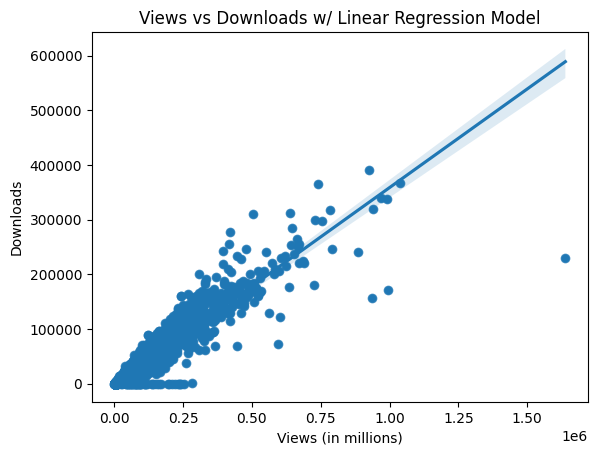

In [ ]:


movie_data.plot.scatter('views', 'downloads')
sns.regplot(x = "views", y = "downloads", data = movie_data)
plt.title("Views vs Downloads w/ Linear Regression Model")
plt.xlabel("Views (in millions)")
plt.ylabel("Downloads")
plt